## Profiling Illumina Data Retrieving Over Dense, Middle and Sparse Genomics Regions on HDD and SSD

* [Density definition and position selection](#region_def)
* [Ramdonly Selected Positions](#pos_sel_intpos)
* [Results for 15K samples](#c)
* [Results for 10K samples](#x)
* [Original results](#i)


### <a name='region_def' />Density Definition and Position Selection

In GenomicsDB, the density is defined by the number of variant of base pair positions, as shown below:

![alt density definition](density_def.png)

The graph below illustrates the regions from where the positions are selected. The dense region is marked in green and it contains top 15% by number of variant. The middle region is defined by the mean value of number of variant (the thick dark line in the graph). Beacuse the mean value is about 3% (means that most position has few variant), I selected 1/3 of low half for sparse region and 1/3 of below mean line for low middle region. 250 and 1000 positions are randomly selected from dense, middle and sparse regions respectively.

![alt position selection](pos_sel_inarea.png)

* The VCF samples were generated by Illumina provided script ‘generator.pl’. Total number of samples are 15000. 
* The GenomicsDBs are loaded on HDD and SSD respectively. Both HDD and SSD are on SATA devices. 
* While the data on SSD were compressed Intel zlib, which is faster but a slightly large footprint, the data on HDD were compressed with Linux zlib.


### Profiling of Random Position Query Experiemnts

Experiment 1

1. 10000 samples
1. Run GenomicsDB query utility in 1, 4, 8 and 16 parallel (data are loaded into 16 GenomicsDB partitions).
1. Retrieve 250 positions in dense, middle and sparse regions.
1. Retrieve 1000 positions in dense, middle and sparse regions.
4. Retrieve the positions from GenomicsDB on HDD and SSD respectively

1. for the same number of parallel, select the same set of positions.
5. each query with 3 config settings (segment size): 1000, 5000 and 10000 
6. repeat each run 3 times (for some experiemnts, no repeat due to deadline)
7. capture iostat for the 1st run of segment size 10000

Experiment 2, the same as above but with 15000 samples

Experiment 3, the same as Experiment 2 but run with a new GenomincsDB query option

Experiment 4, incremental add samples and query GenomicsDB after each loading. This task has 3 subtasks, all end up with 15000 samples:
* increment 1000 at time and do it 15 times
* increment 3000 at time and do it 5 times
* increment 7500 at time and do it 2 times

Due to the distribution of number of variant changes as the DB size increasing, the selected positions changes. 

In [5]:
from py_report.intpos_query_pos import ViewPositions
from py_report.variant_density_results import IlluminaResult, BY_CPU, BY_TIME
from py_scratch.t_dense_sparse import MyIlluminaConfig

hosts = ['compute-2-28']           # 'compute-2-27', 'compute-2-28'
pos_viewer = ViewPositions('illumina')
df_qjson = pos_viewer.build_qjsoncfg_df('x', 'illumina')
array_start_pos = MyIlluminaConfig('x').array_start_pos
num_pos = 250

#### Number of Runs

A run is an execution of GenomicsDB query utility, whether retrieve 250 Positions or 1000 positions. For each experiement, there are 144 run per node. An experiment normally run on least 2 nodes. In this case, a node is a computer with 44 cores.  

* Total_runs =  2 (Nun_pos) x 3 (Density) x 2 (Device) x 4 (Parallel) x 3 (SegSize) = 144
* Earlier runs were repeated 3 times: 144 x 3 (Repeat) = 432
* The following 3D image shows all the runs. 
* By the way, number of iostat logs is 48 

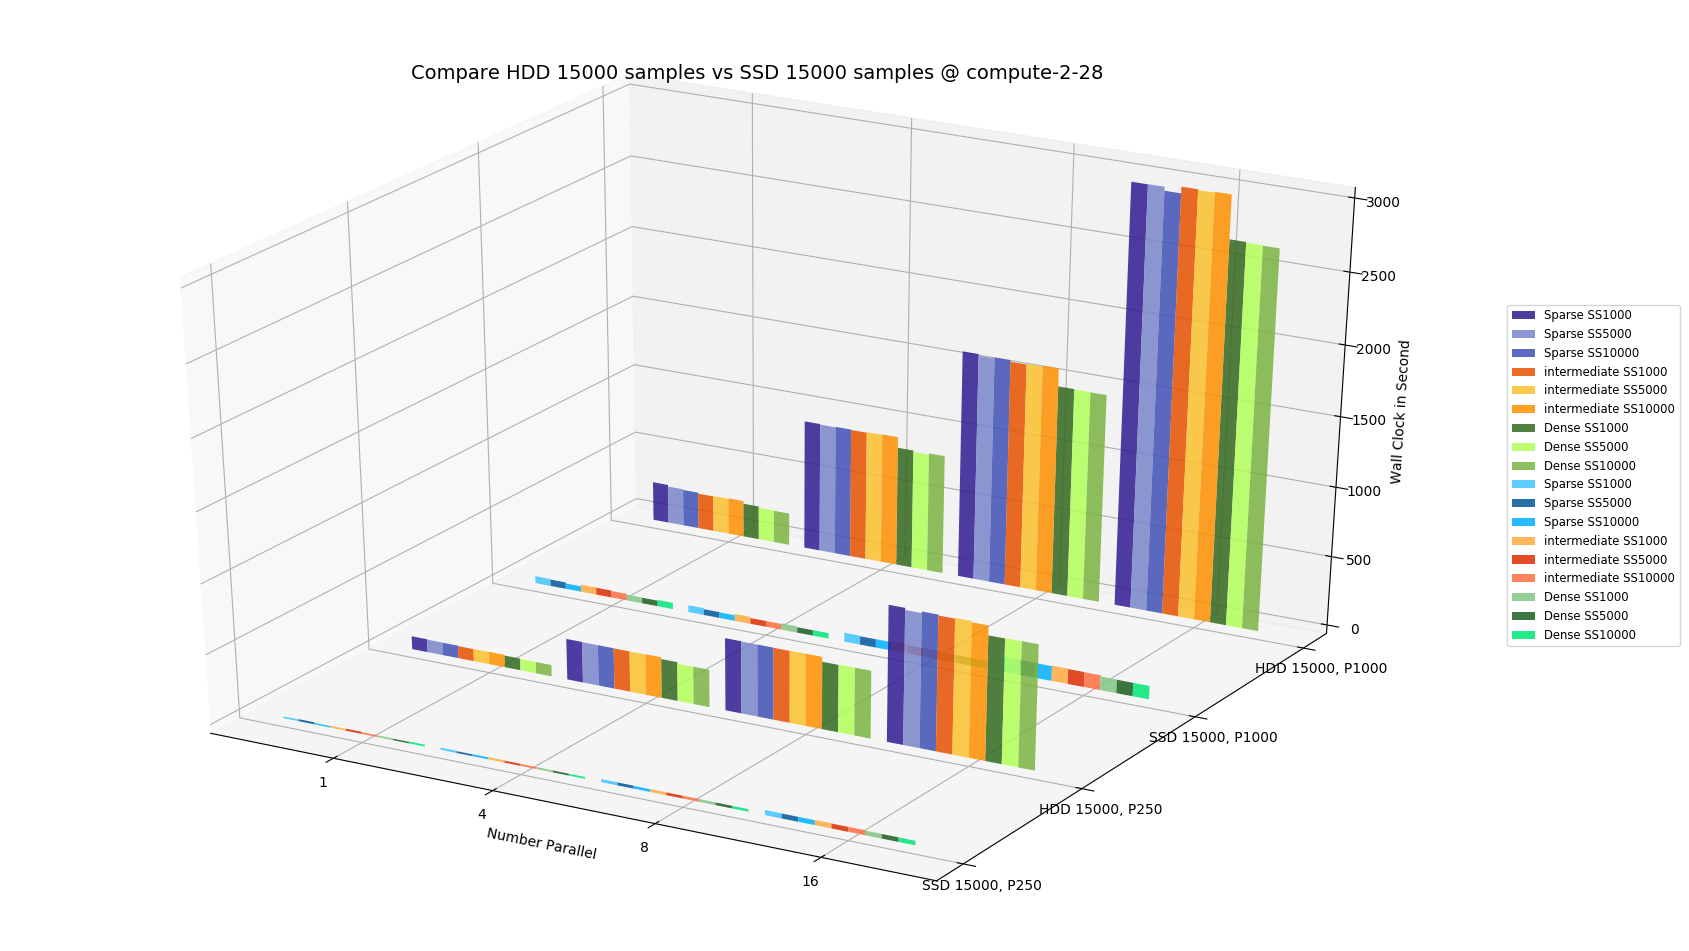

In [11]:
# 15K samples with --print-AC
from py_report.variant_density_results import IlluminaResult, BY_CPU, BY_TIME
handler_c = IlluminaResult('c', proj_name='illumina-c', sel_hosts=['compute-2-28'])
handler_c.view_3D_by_eids([0, 1])

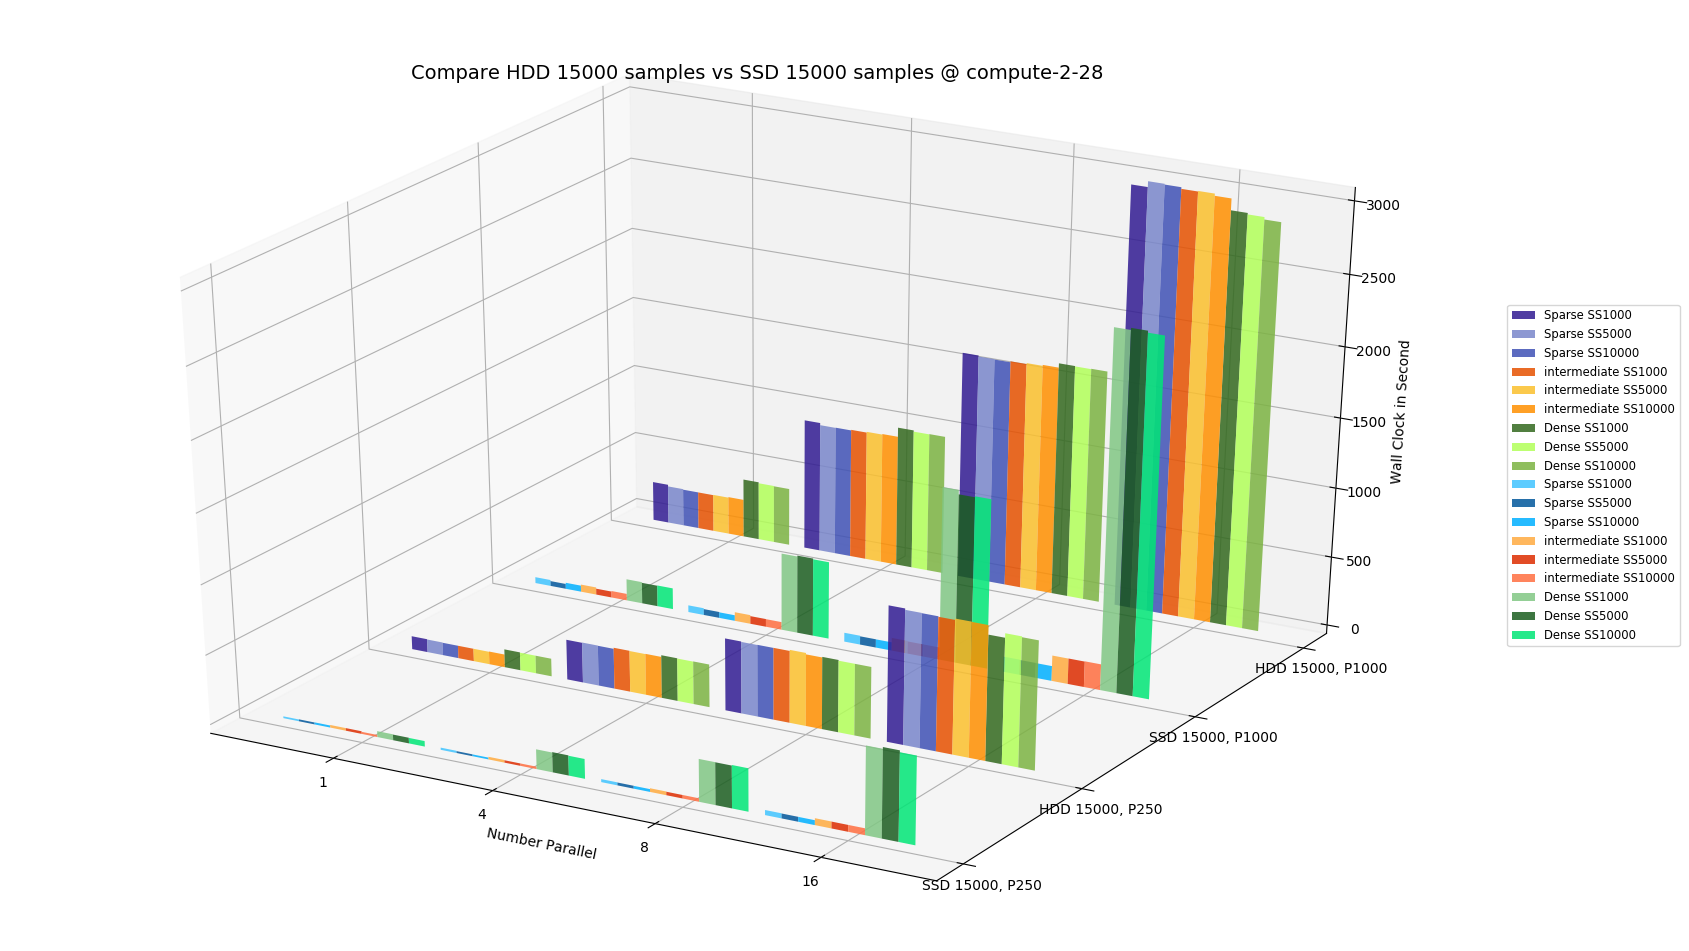

In [15]:
# 15K samples with --print-AC
from py_report.variant_density_results import IlluminaResult, BY_CPU, BY_TIME
handler_c = IlluminaResult('c', proj_name='illumina-y', sel_hosts=['compute-2-28'])
handler_c.view_3D_by_eids([0, 1])

<code>
The better named sample result files could be found at compute-2-26:/scratch/results/
-rw-r--r--+ 1 mingrutar ccc 1.1M Oct 24 11:26 print-AC-hdd-16p
-rw-r--r--+ 1 mingrutar ccc 118K Oct 24 11:24 print-AC-hdd-1p
-rw-r--r--+ 1 mingrutar ccc 278K Oct 24 11:25 print-AC-hdd-4p
-rw-r--r--+ 1 mingrutar ccc 608K Oct 24 11:26 print-AC-hdd-8p
-rw-r--r--+ 1 mingrutar ccc 1.2M Oct 24 11:27 print-AC-ssd-16p
-rw-r--r--+ 1 mingrutar ccc 120K Oct 24 11:24 print-AC-ssd-1p
-rw-r--r--+ 1 mingrutar ccc 329K Oct 24 11:25 print-AC-ssd-4p
-rw-r--r--+ 1 mingrutar ccc 632K Oct 24 11:26 print-AC-ssd-8p
-rw-r--r--+ 1 mingrutar ccc 110K Oct 24 11:28 print-calls-10k-hdd-1p
-rw-r--r--+ 1 mingrutar ccc 110K Oct 24 11:29 print-calls-10k-hdd-4p
-rw-r--r--+ 1 mingrutar ccc 110K Oct 24 11:30 print-calls-10k-hdd-8p
-rw-r--r--+ 1 mingrutar ccc 111K Oct 24 11:31 print-calls-10k-hhd-16p
-rw-r--r--+ 1 mingrutar ccc 110K Oct 24 11:29 print-calls-10k-sdd-4p
-rw-r--r--+ 1 mingrutar ccc 111K Oct 24 11:31 print-calls-10k-ssd-16p
-rw-r--r--+ 1 mingrutar ccc 110K Oct 24 11:29 print-calls-10k-ssd-1p
-rw-r--r--+ 1 mingrutar ccc 110K Oct 24 11:30 print-calls-10k-ssd-8p
-rw-r--r--+ 1 mingrutar ccc 1.1M Oct 24 11:23 print-calls-hdd-16p
-rw-r--r--+ 1 mingrutar ccc 118K Oct 24 11:20 print-calls-hdd-1p
-rw-r--r--+ 1 mingrutar ccc 267K Oct 24 11:21 print-calls-hdd-4p
-rw-r--r--+ 1 mingrutar ccc 566K Oct 24 11:22 print-calls-hdd-8p
-rw-r--r--+ 1 mingrutar ccc 1.2M Oct 24 11:23 print-calls-ssd-16p
-rw-r--r--+ 1 mingrutar ccc 127K Oct 24 11:21 print-calls-ssd-1p
-rw-r--r--+ 1 mingrutar ccc 326K Oct 24 11:22 print-calls-ssd-4p
-rw-r--r--+ 1 mingrutar ccc 579K Oct 24 11:23 print-calls-ssd-8p
</code>

View a saample result file: ssh compute-2-26 less /scratch/results/print-AC-ssd-4p

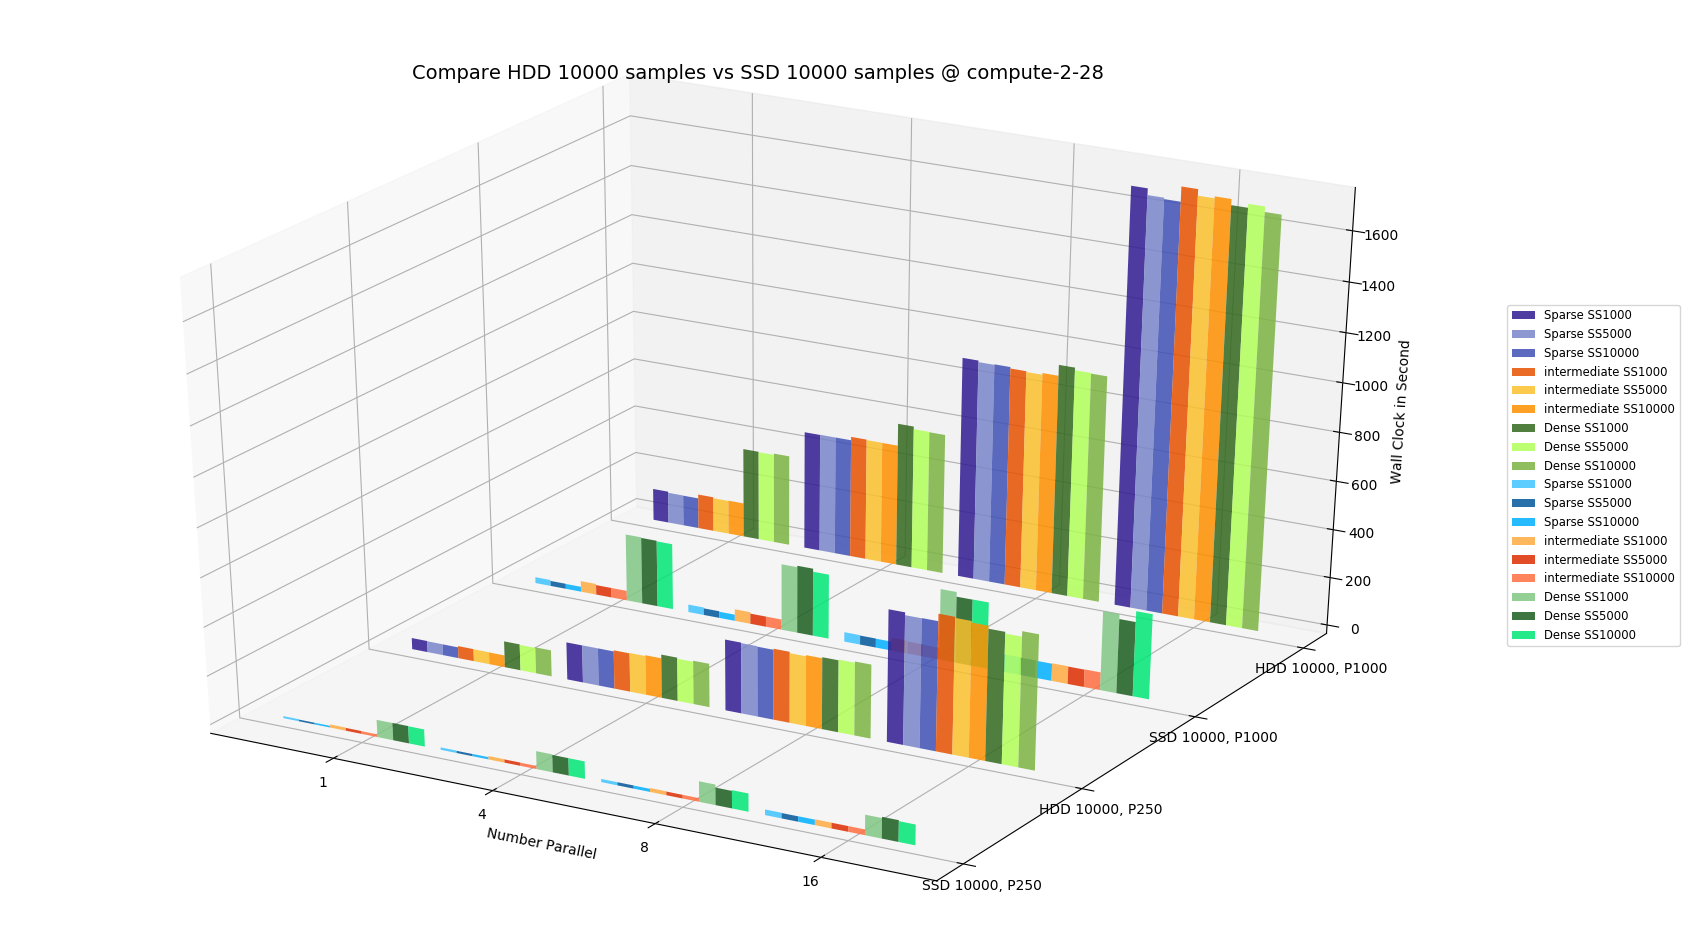

In [12]:
# 10K samples with --print-calls
from py_report.variant_density_results import IlluminaResult, BY_CPU, BY_TIME
handler_x = IlluminaResult('x', proj_name='illumina-x', sel_hosts=['compute-2-28'])
handler_x.view_3D_by_eids([0, 1])

### <a name='pos_sel_intpos'/>Selected  Positions
The graphs data and settings:
* partition one only
* 250 selected positions per area
* x-axis is the 'Number of Positions' (in this case up to partition 1)
* y-axis is the 'Number of Variant'
* the <span style="color:#EFEBE9">light brown</span> color dots (look like background) are interesting positions
* the thick horizontal <span style="color:#455A64">dark line</span> is the mean value of number variant of interesting positions
* the <span style="color:#76FF03">green</span>/<span style="color:#D4E157">olive</span> colors are the randomly selected positions in dense area (dense means high number of variant)
* the <span style="color:#FF3D00">red</span> and <span style="color:#FFAB40">orange</span> colors are the randomly selected positions in middle area
* the <span style="color:#2196F3">blue</span> and <span style="color:#18FFFF">cyan</span> colors are the randomly selected positions in sparse area 

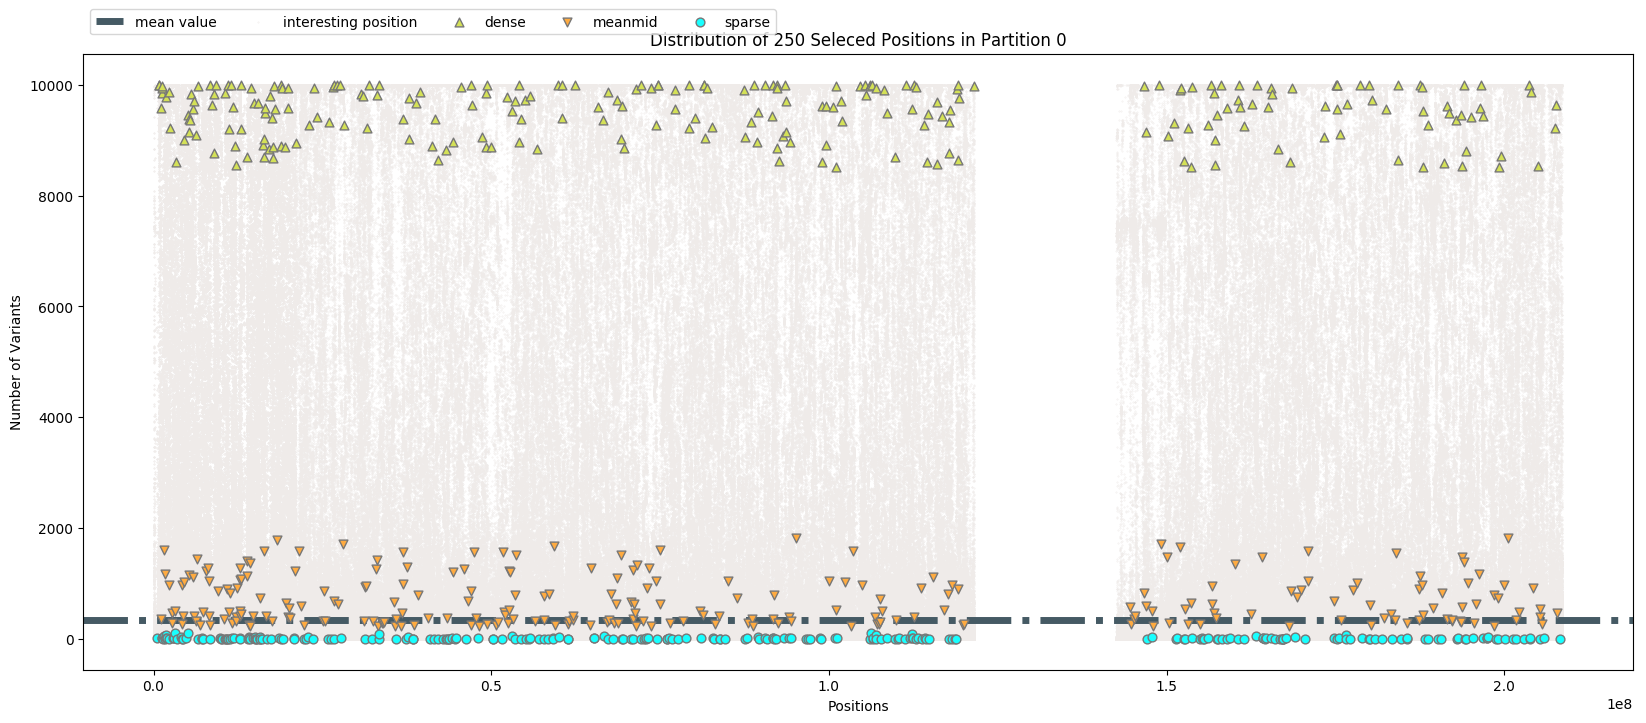

In [3]:
pos_viewer.plot_with_intpos(df_qjson, num_pos, 0, [1])

The above figure shows the distribution of selected position in partition one for <b>one parallel run</b>
<br/><br/>

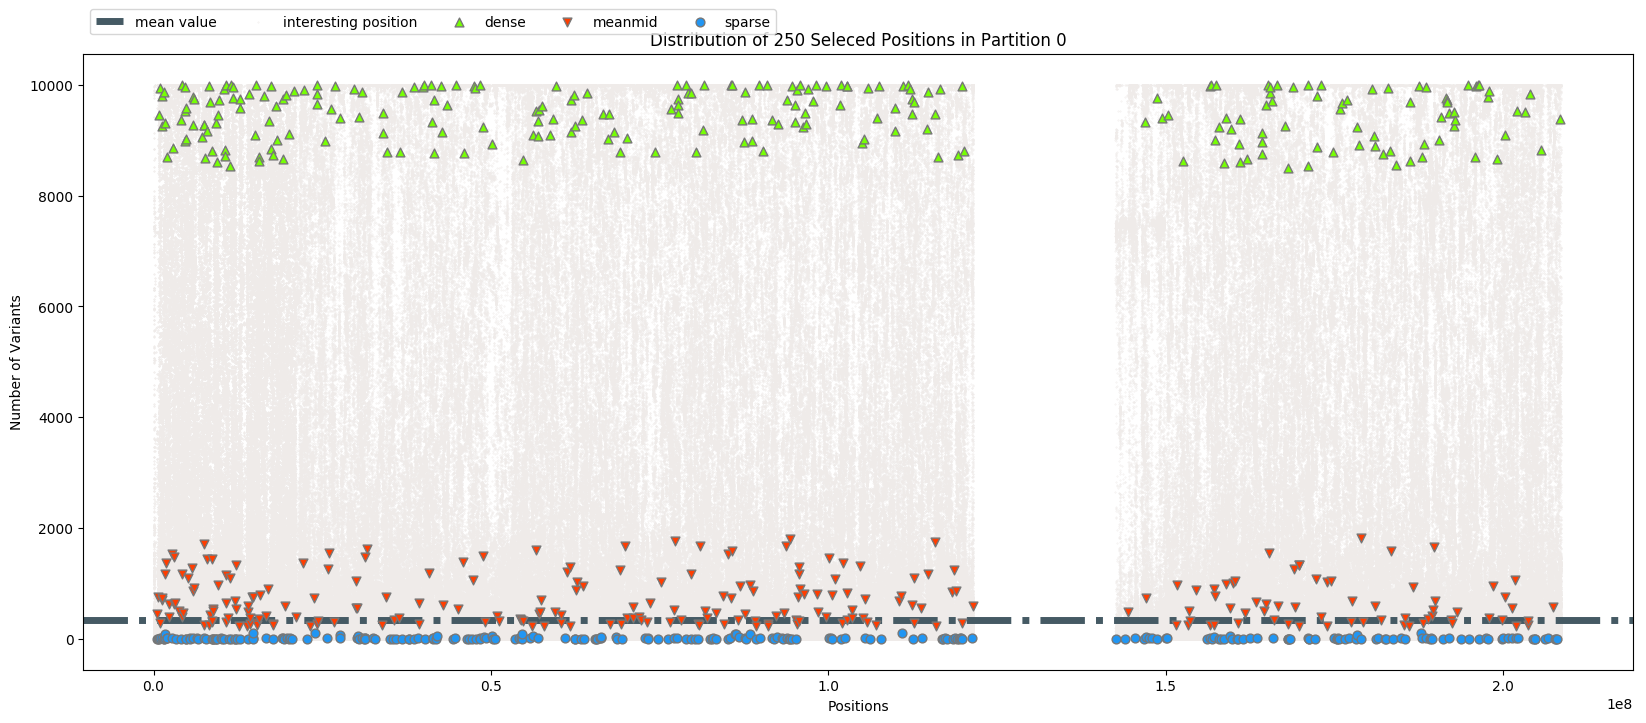

In [4]:
pos_viewer.plot_with_intpos(df_qjson, num_pos, 0, [4])

The above figure shows the distribution of selected position in partition one for <b>Four parallel run</b>
<br/><br/>

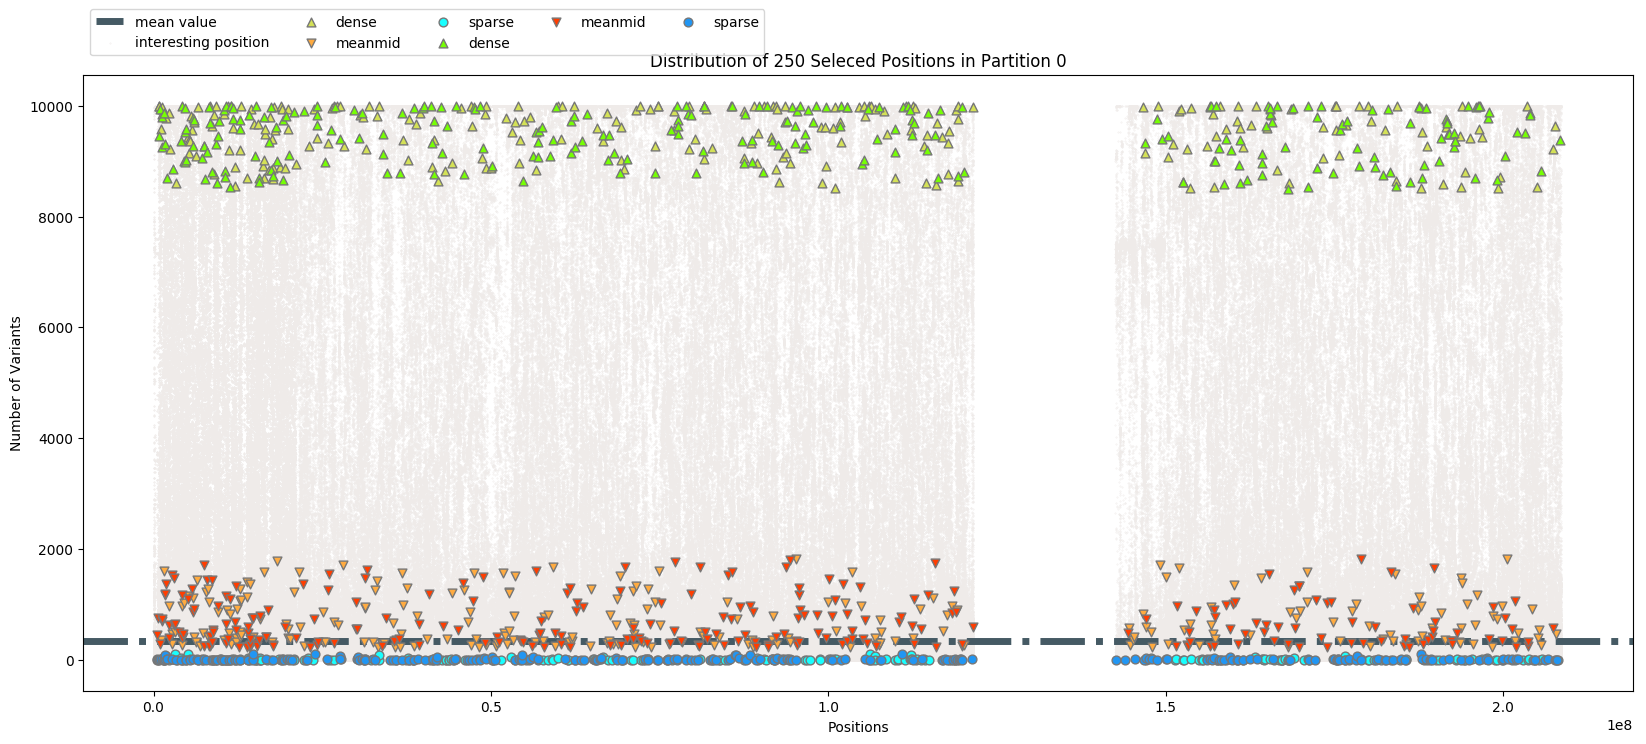

In [2]:
pos_viewer.plot_with_intpos(df_qjson, num_pos, 0, [1, 4])

The above figure shows the distribution of selected position in partition one for <b>one and four parallel run</b>. From the colors, one can see the difference in selected position distributions of two runs.
<br/>

#### <a name='pos_sel' /> Ramdonly Selected Positions Only

The figure sel_pos_in_areas.png shows the distribution of 250 selected positions. Each sub-graph shows the position distribution with a number of parallel. The dash vertical lines are the partition boundaries. As the graph shows all selected positions are with the number partitions within parallel run
The figure sel_pos_in_areas_part.png shows position distribution in each partition grouped by the number of parallel.

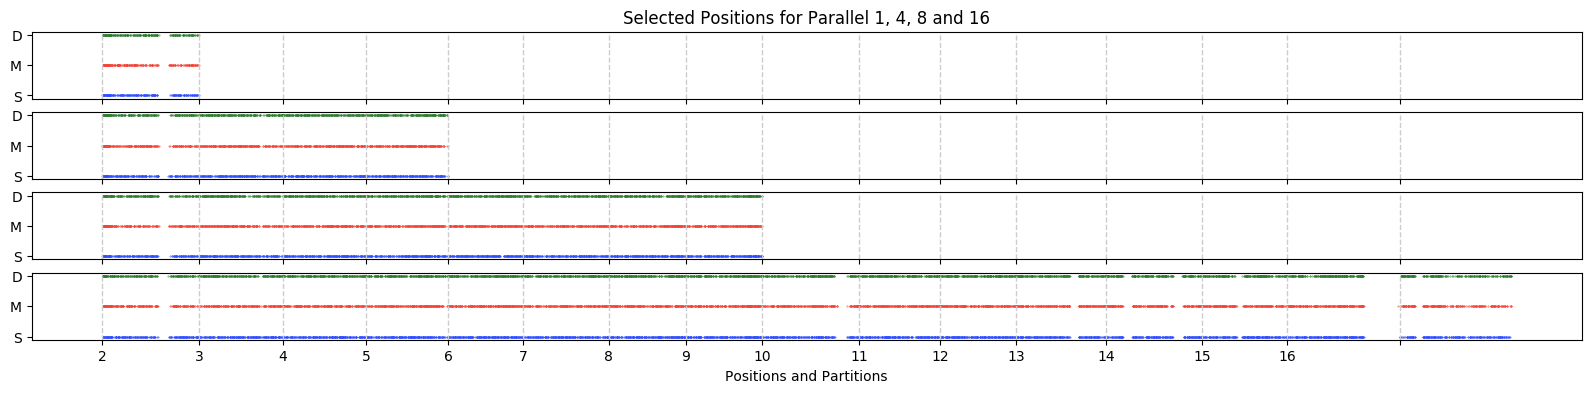

In [5]:
pos_viewer.plot_sel_pos_run(df_qjson, num_pos, array_start_pos)

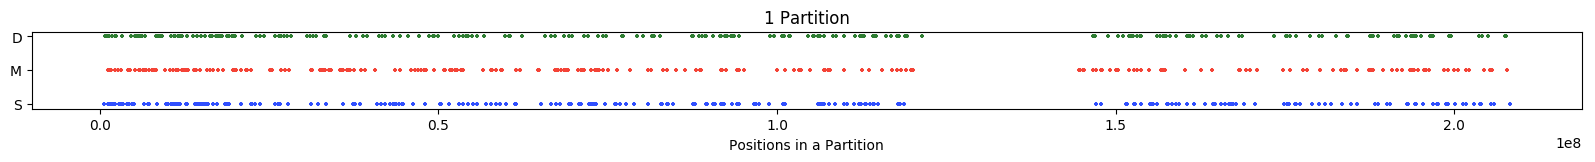

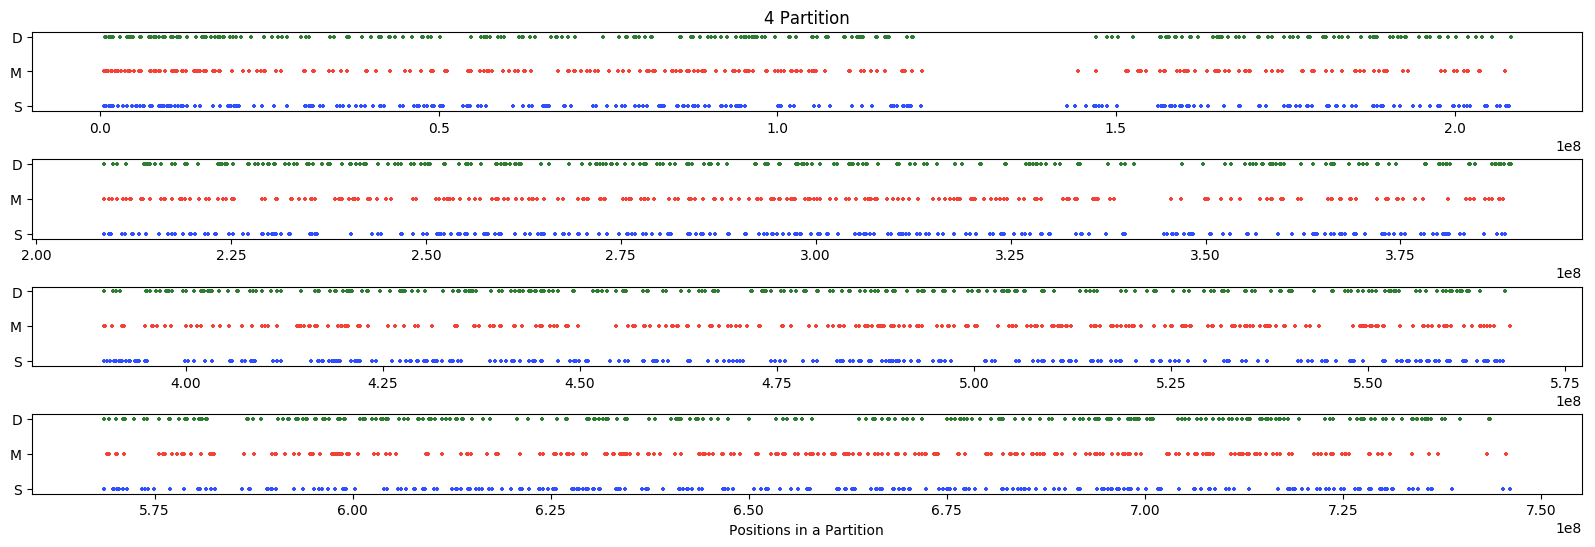

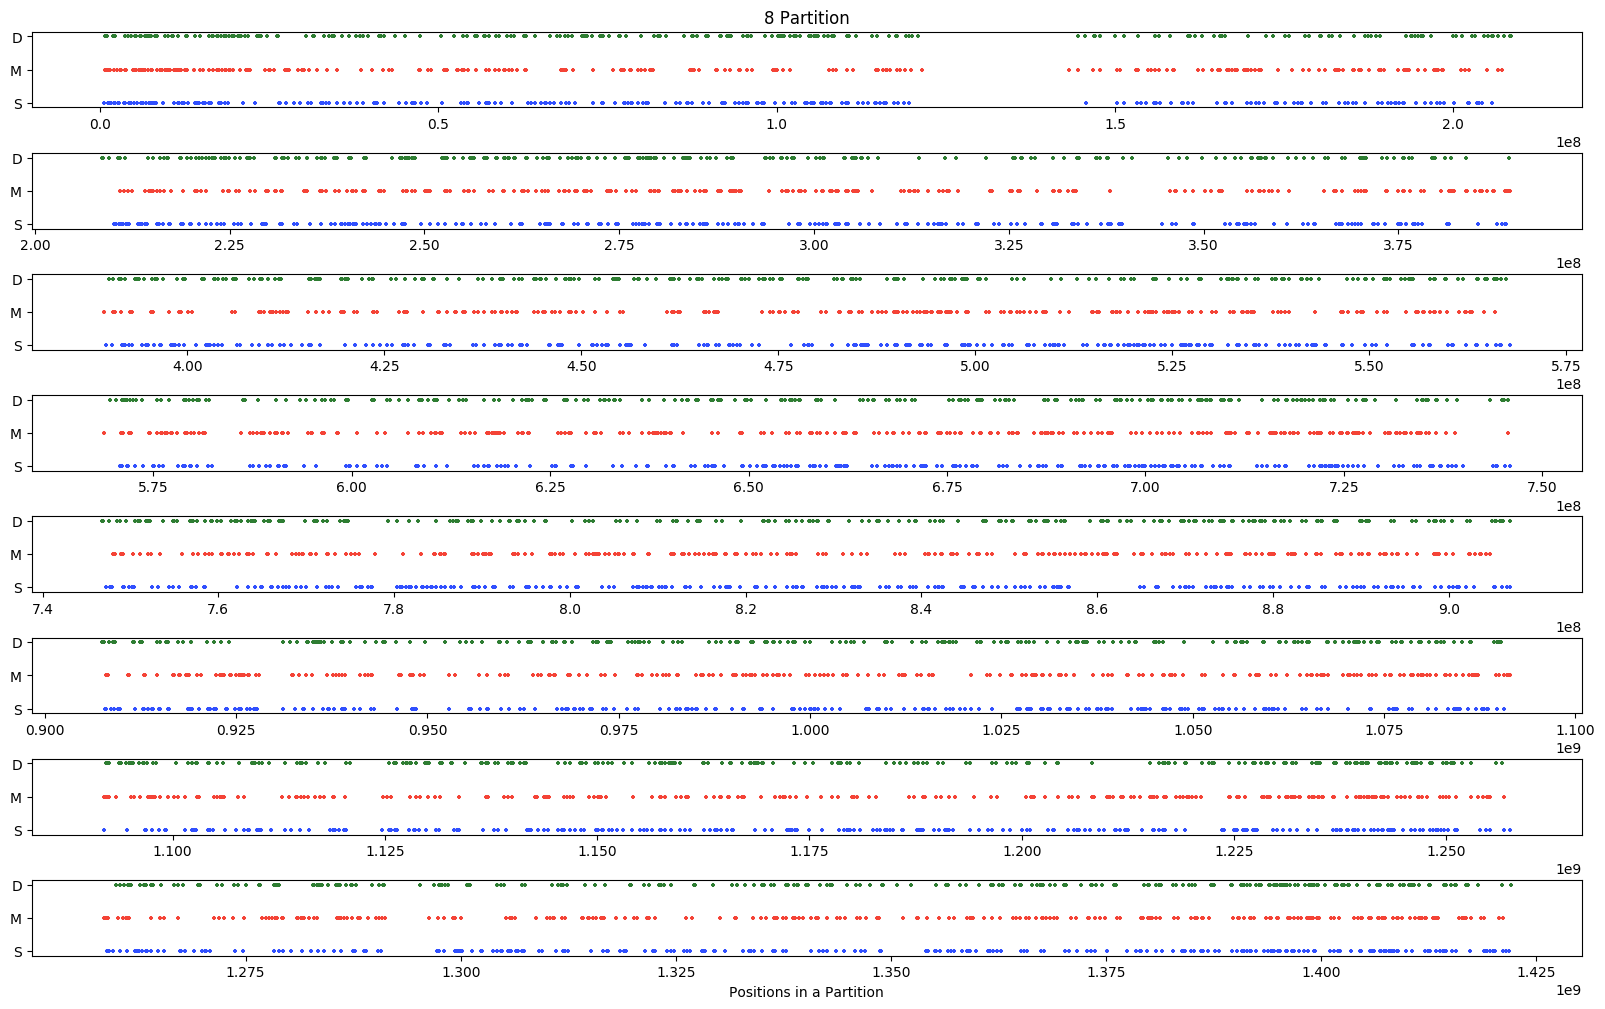

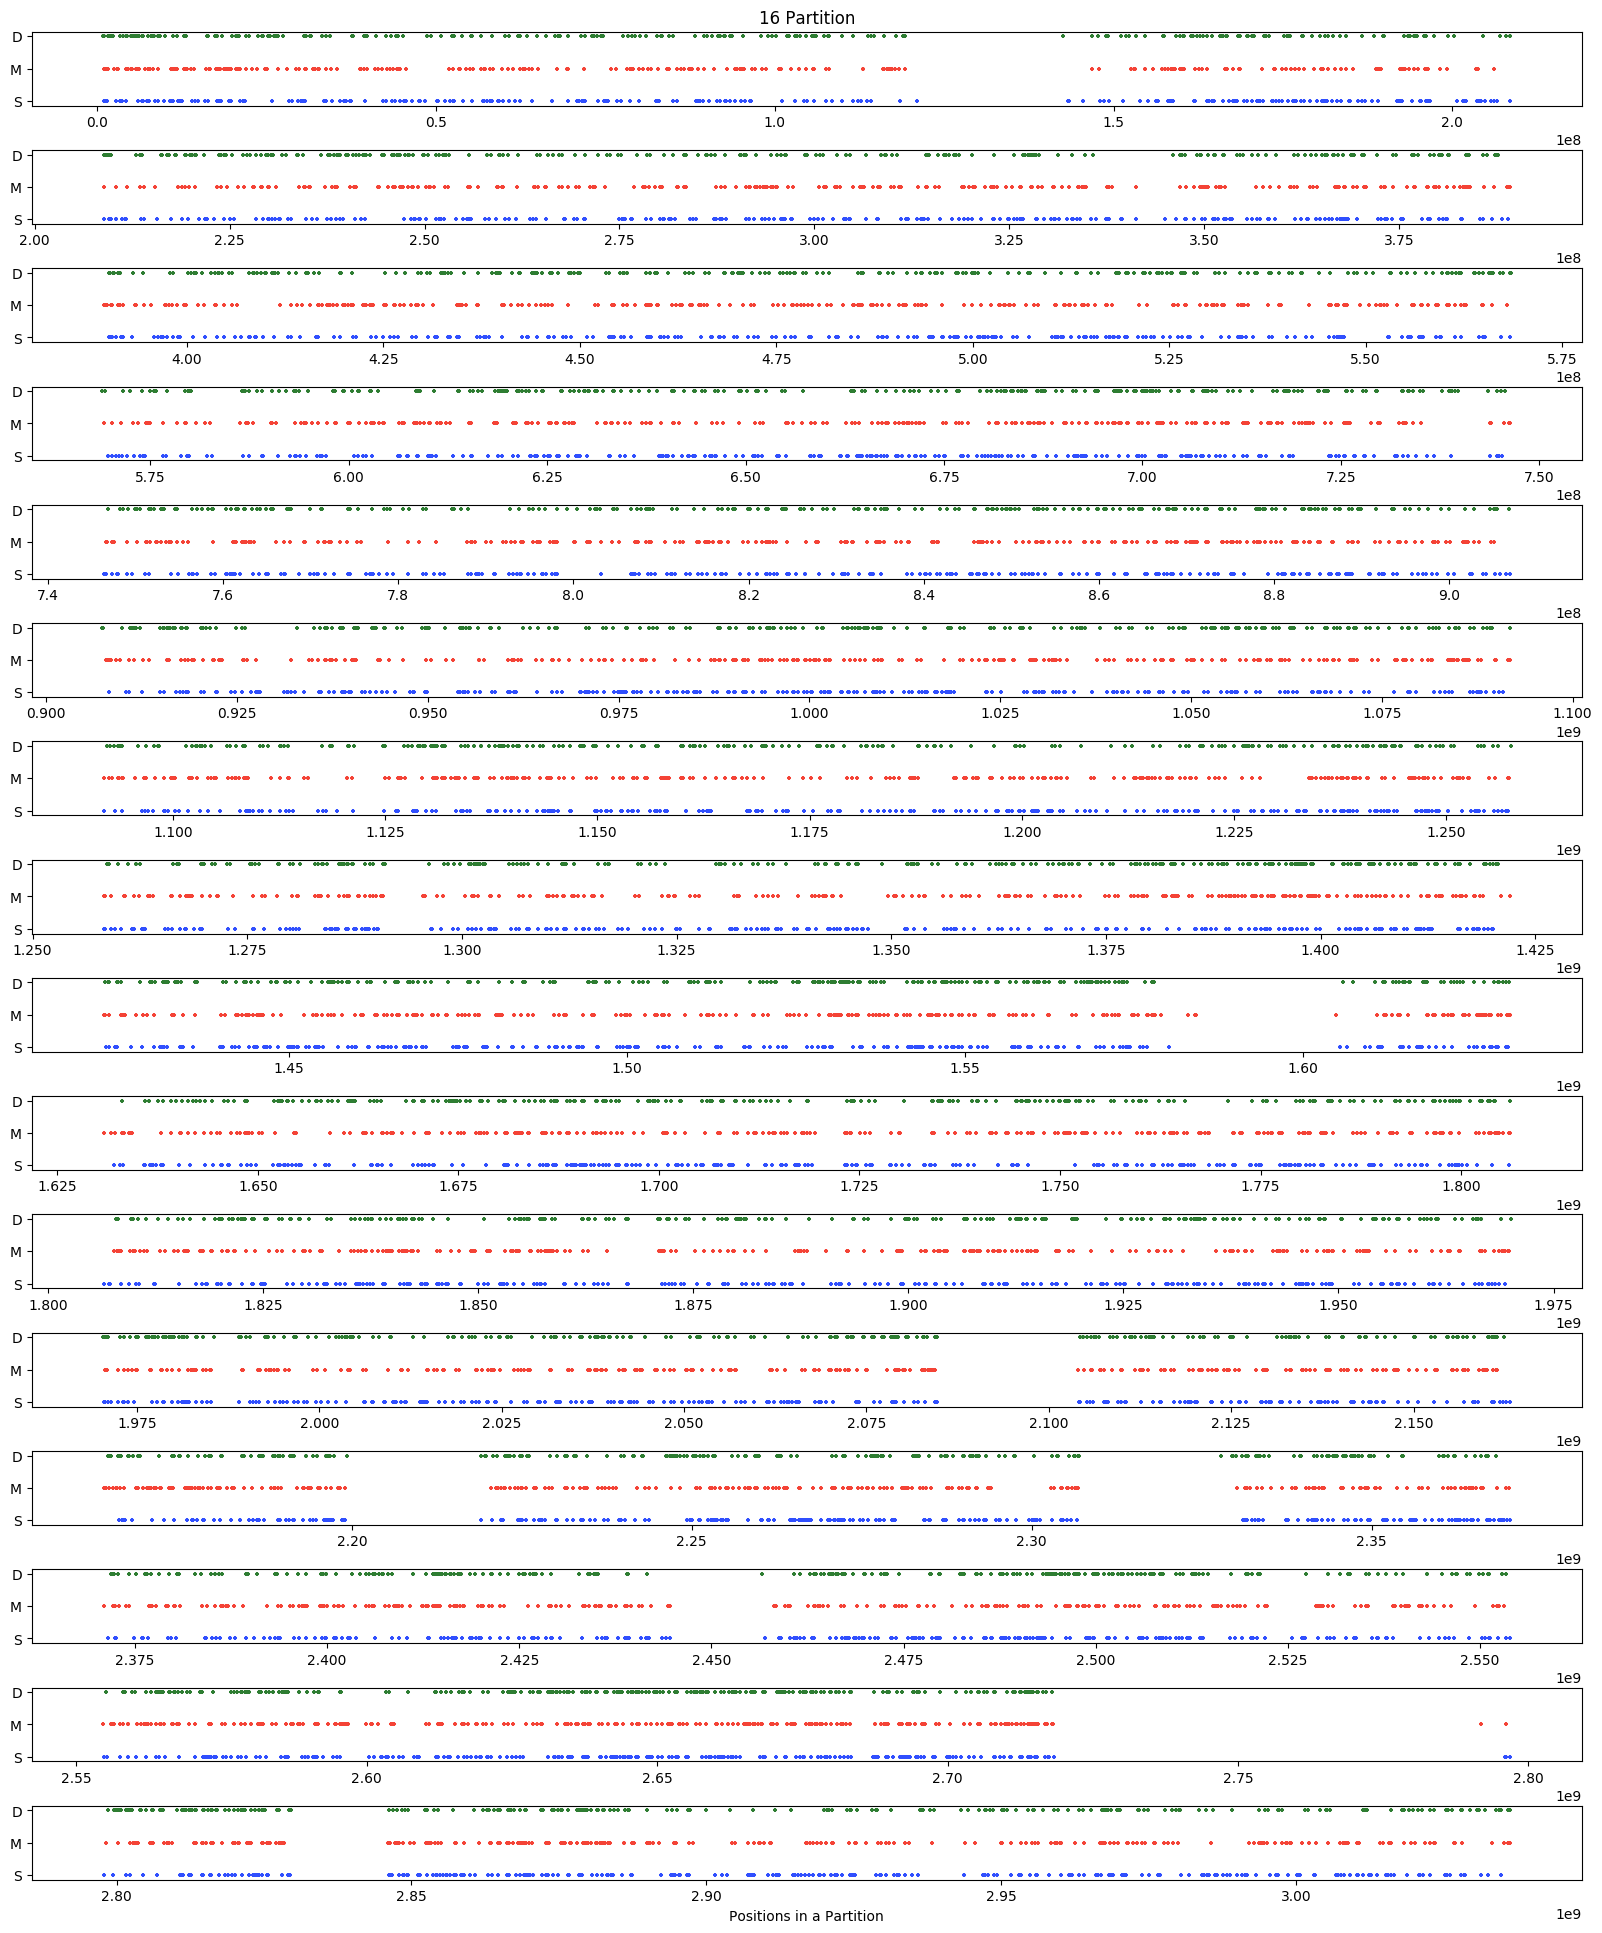

In [6]:
pos_viewer.plot_sel_pos_partition(df_qjson, num_pos)

<a name='c'/><b>Comparison HDD vs SSD for 15K</b>

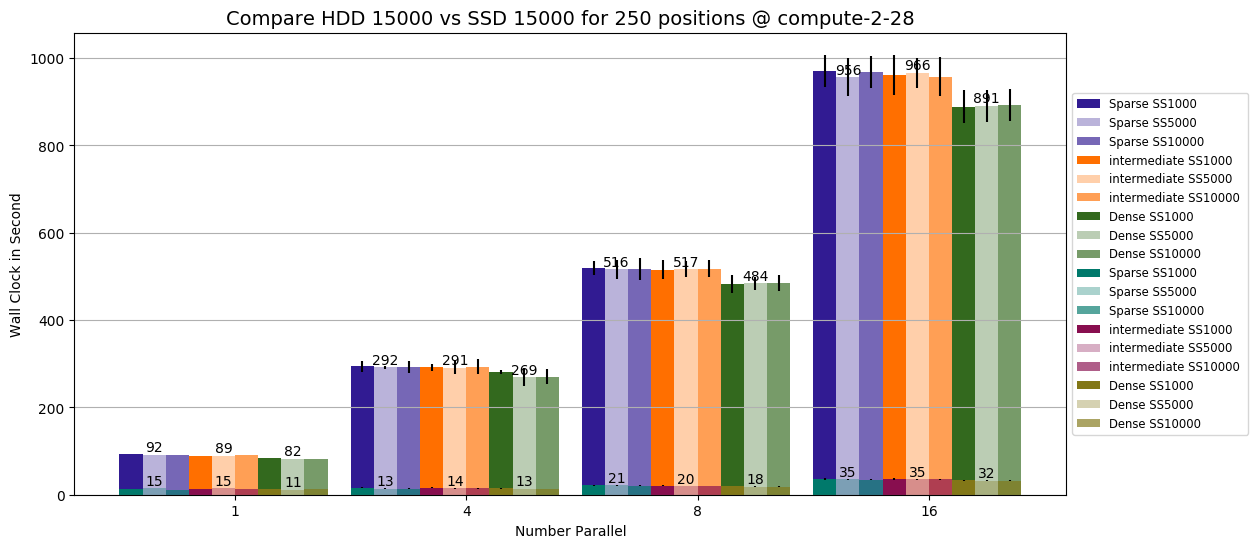

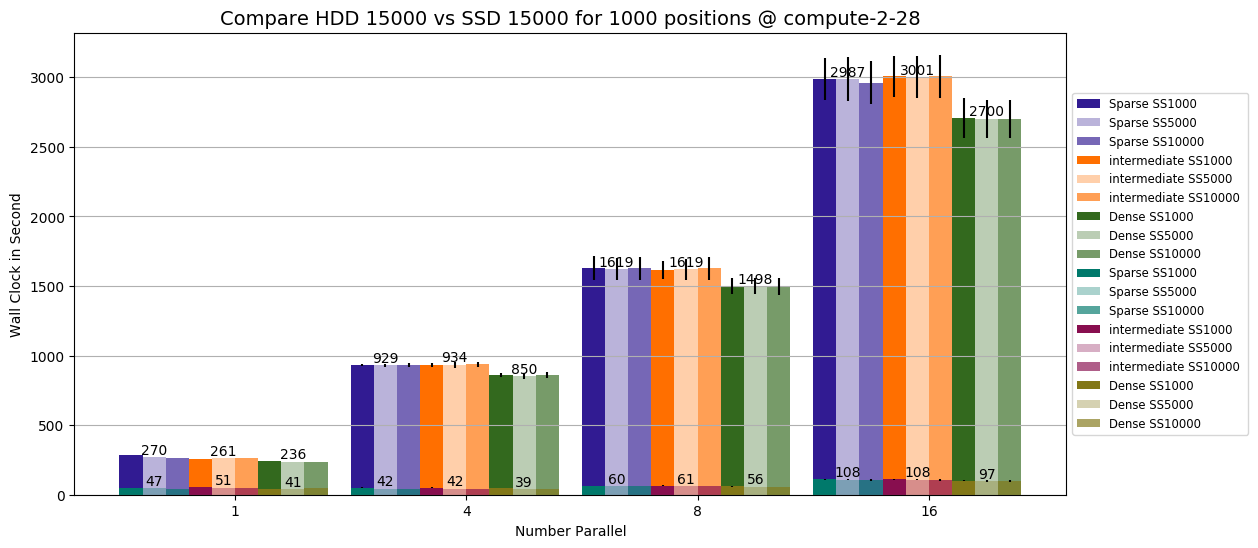

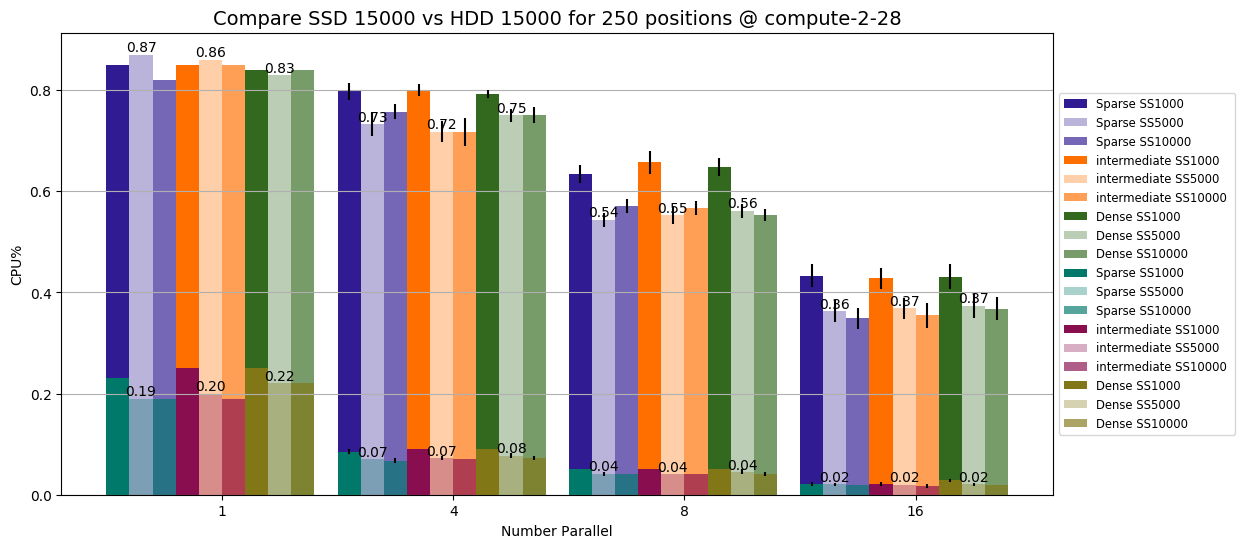

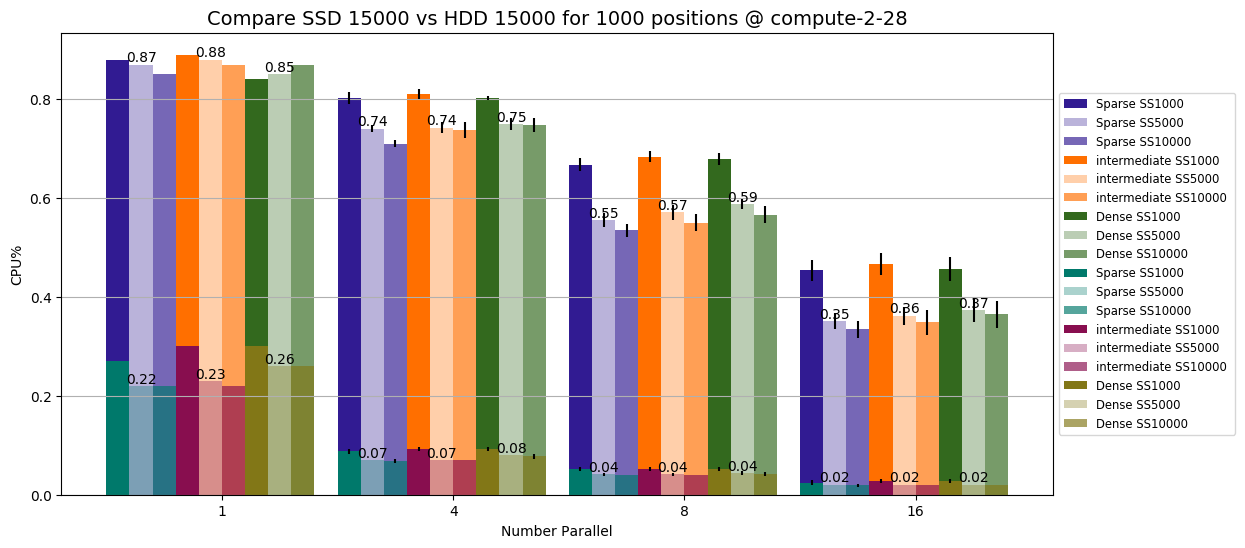

In [13]:
handler_c.compare_group_by_eids([(0, 1)], None, BY_TIME)
handler_c.compare_group_by_eids([(1, 0)], None, BY_CPU)

<a name='x' /> <b>Comparison HDD vs SSD for 10K</b>

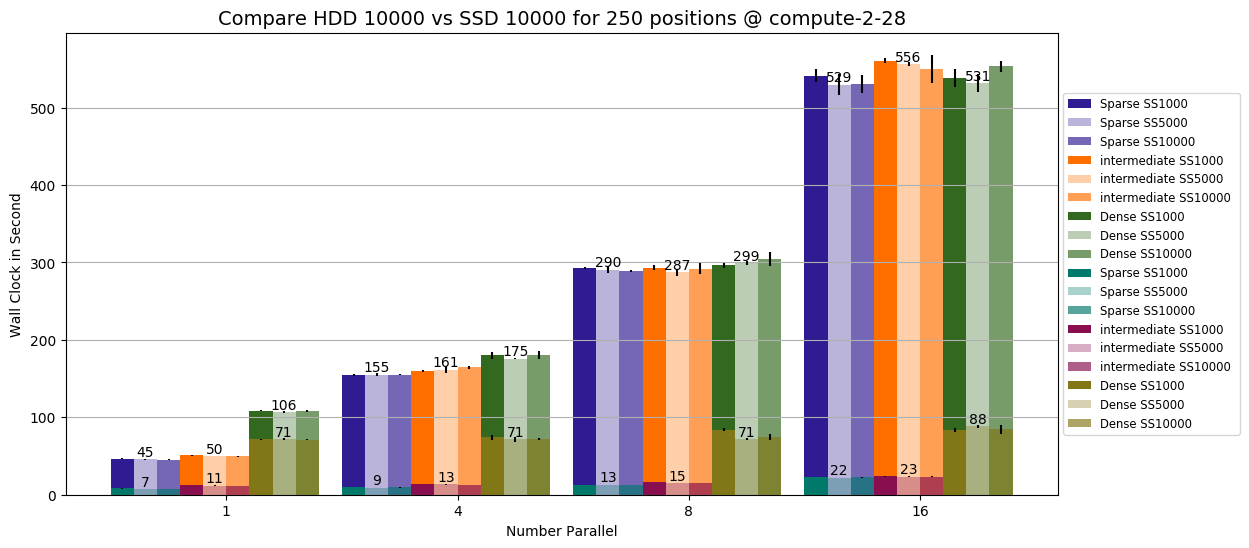

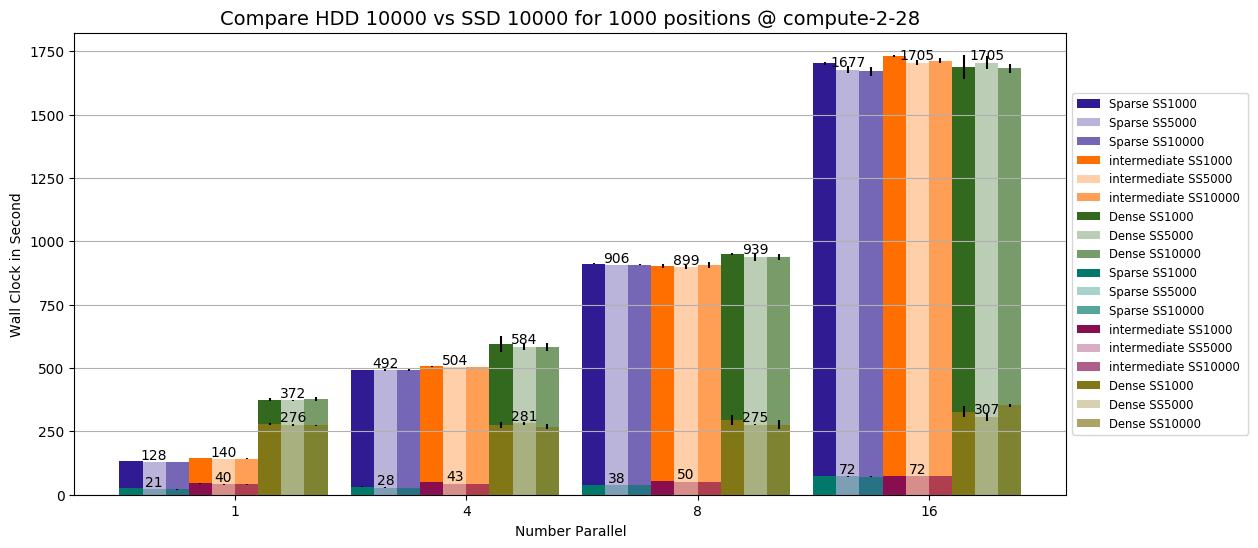

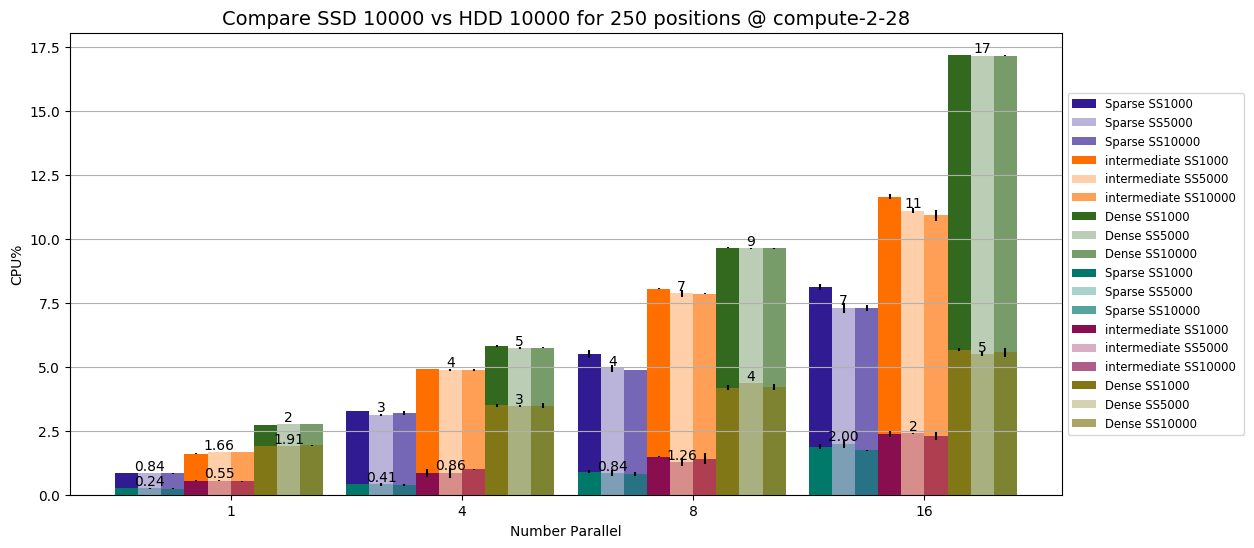

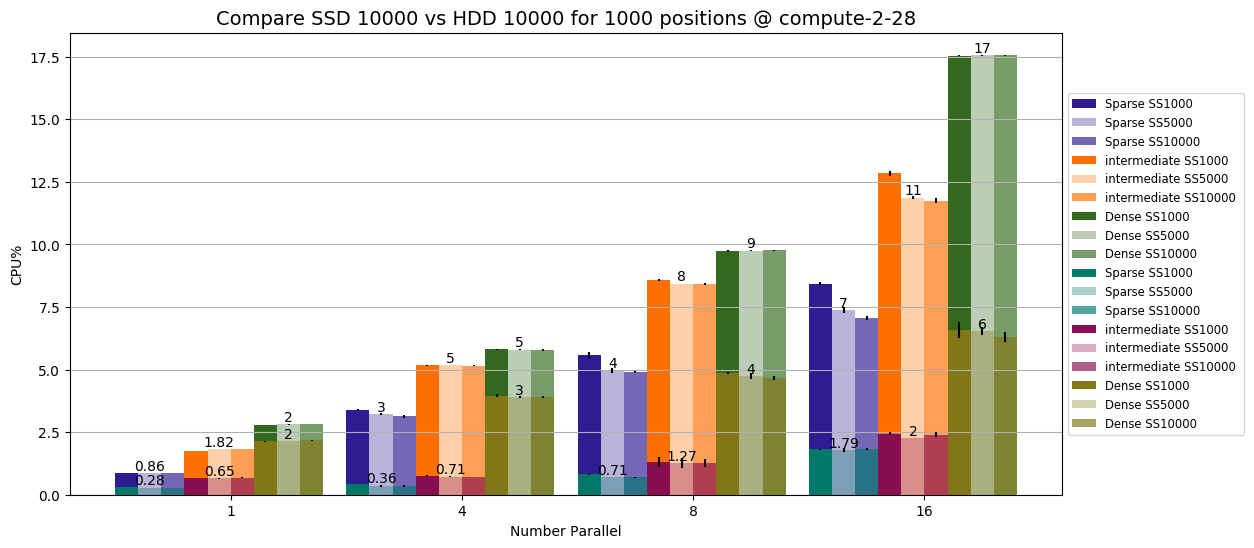

In [14]:
handler_x.compare_group_by_eids([(0, 1)], None, BY_TIME)
handler_x.compare_group_by_eids([(1, 0)], None, BY_CPU)

### <a name='i'/> Original Test
Original position selection algorithm
number of samples: 5000, 10000 and 15000

#### 3D view of profiling data
* HDD 15000 means query performed over 15000 samples on HDD 
* SSD 5000 means query performed over 5000 samples on SSD 

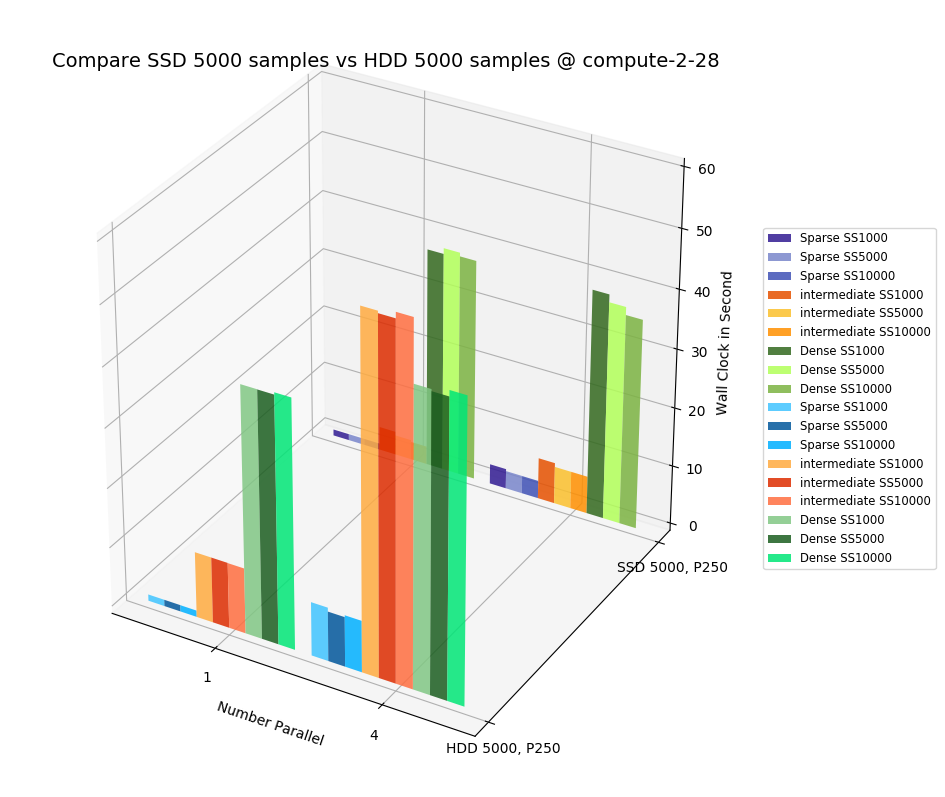

In [10]:
hosts = ['compute-2-28']
handler = IlluminaResult('i', proj_name='illumina', sel_hosts=hosts)
handler.view_3D_by_eids([1, 0], [250])       # 108 queries
#handler.view_3D_by_eids([2, 3])              # 216

### Compare Wall Clock time and CPU% by number samples over 1 and 16 parallel, SSD vs HDD 

<b>Note</b> We notice that CPU% seems inaccurate because the value is > 100% for 1 parallel.

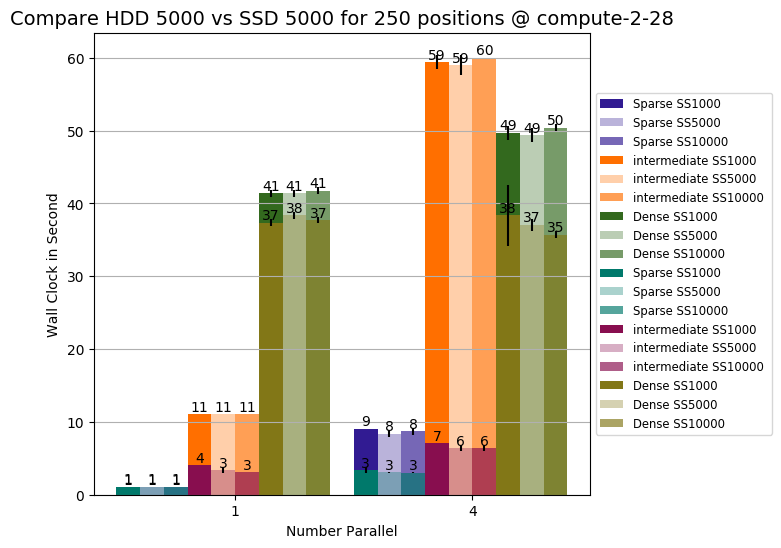

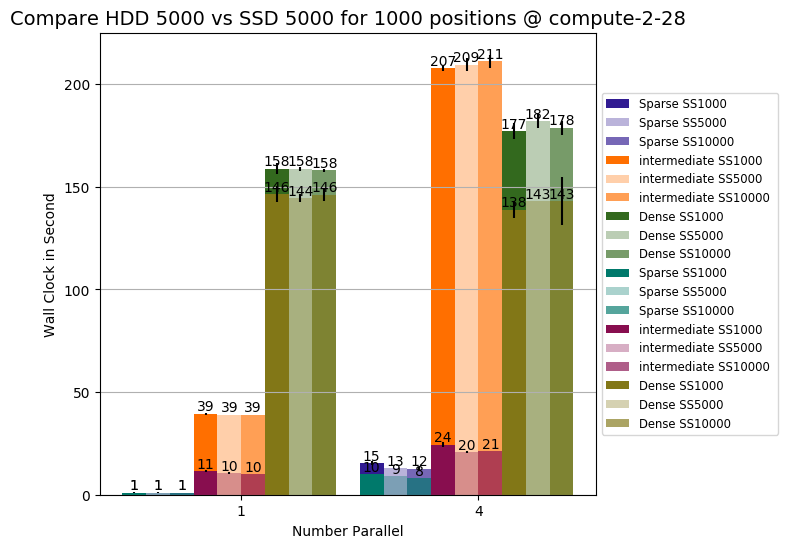

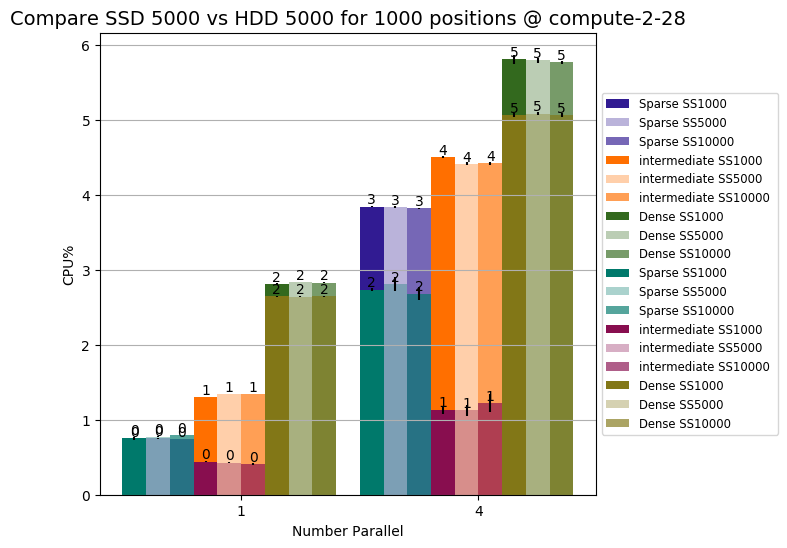

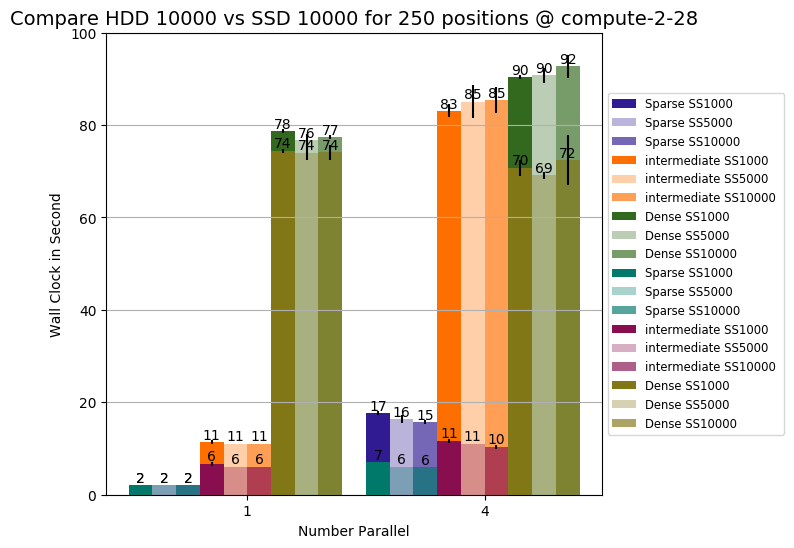

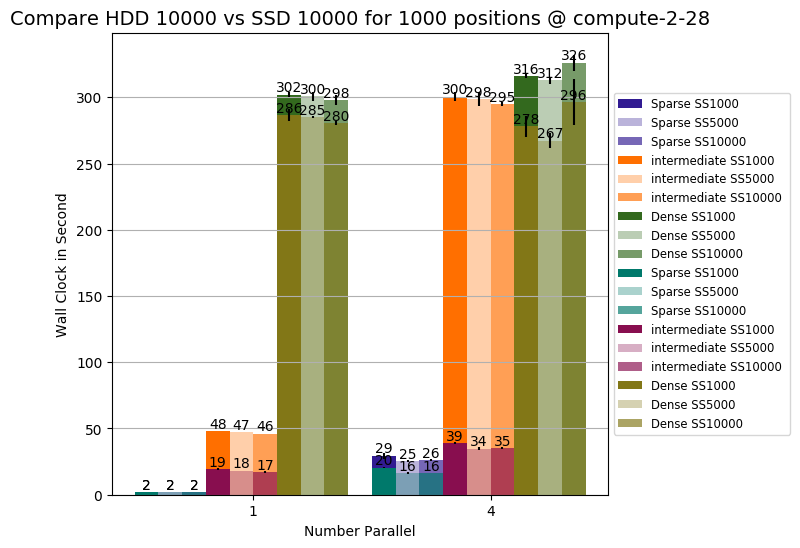

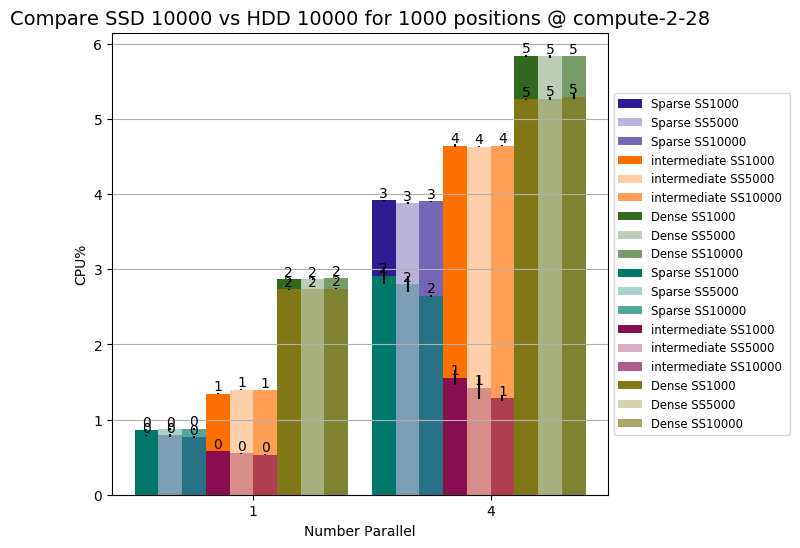

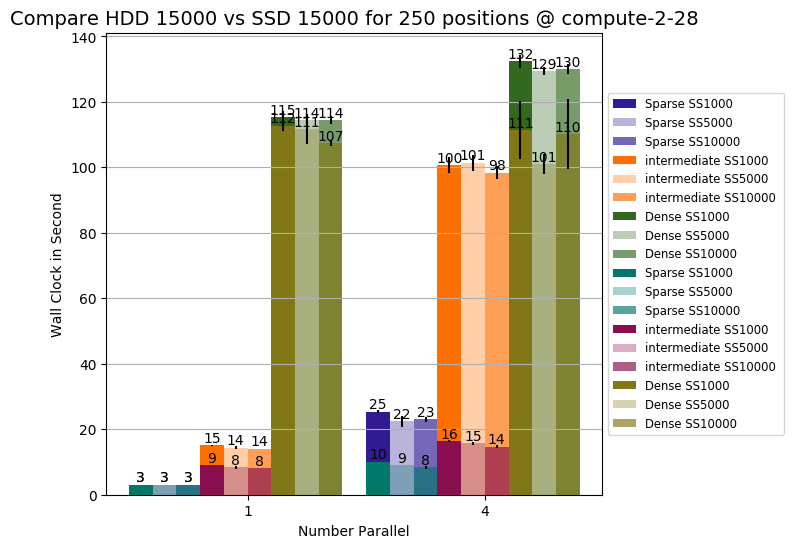

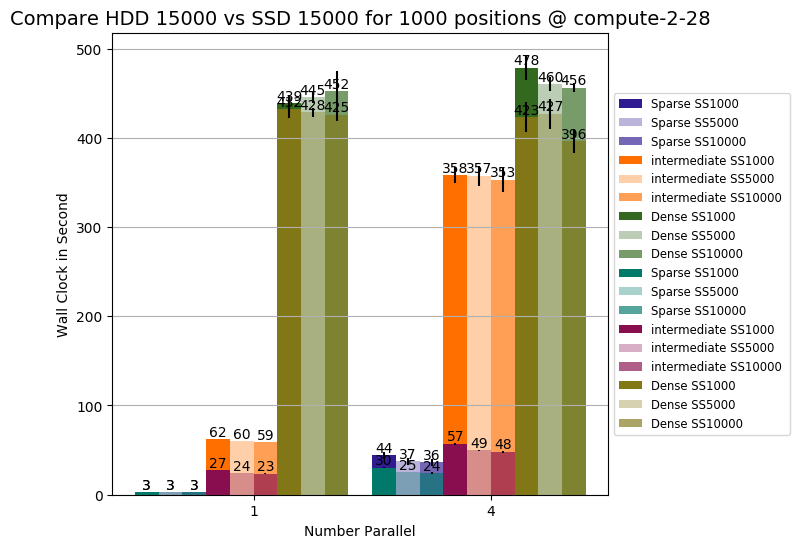

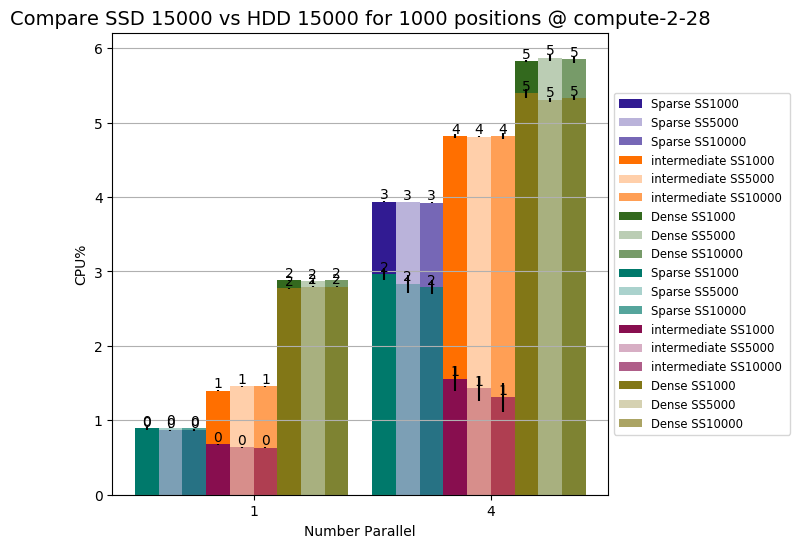

In [11]:
for i in range(0, 5, 2):
    handler.compare_group_by_eids([(i, i+1)], None, BY_TIME)
    handler.compare_group_by_eids([(i+1, i)], [1000], BY_CPU)

### Compare Wall Clock time by number samples over 1 and 16 parallel, SSD vs HDD

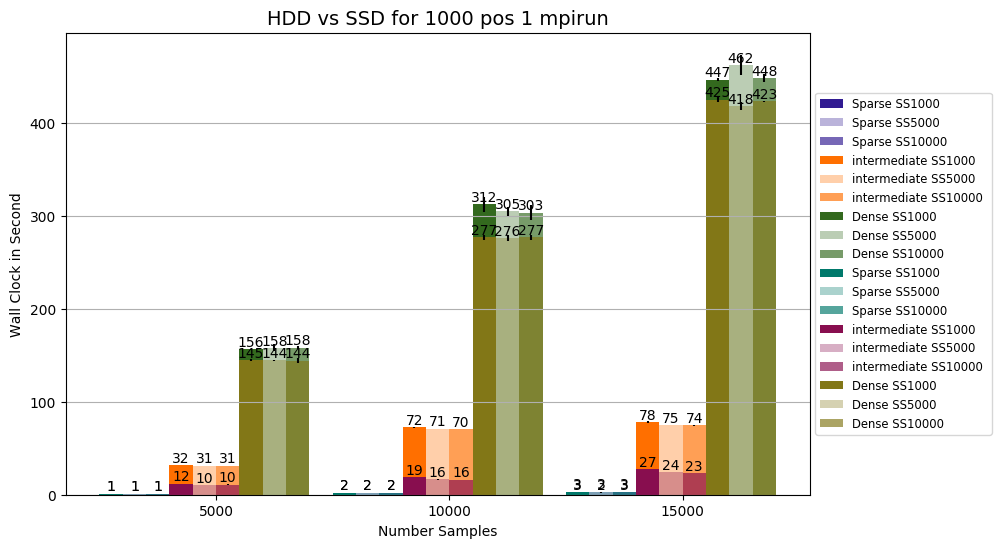

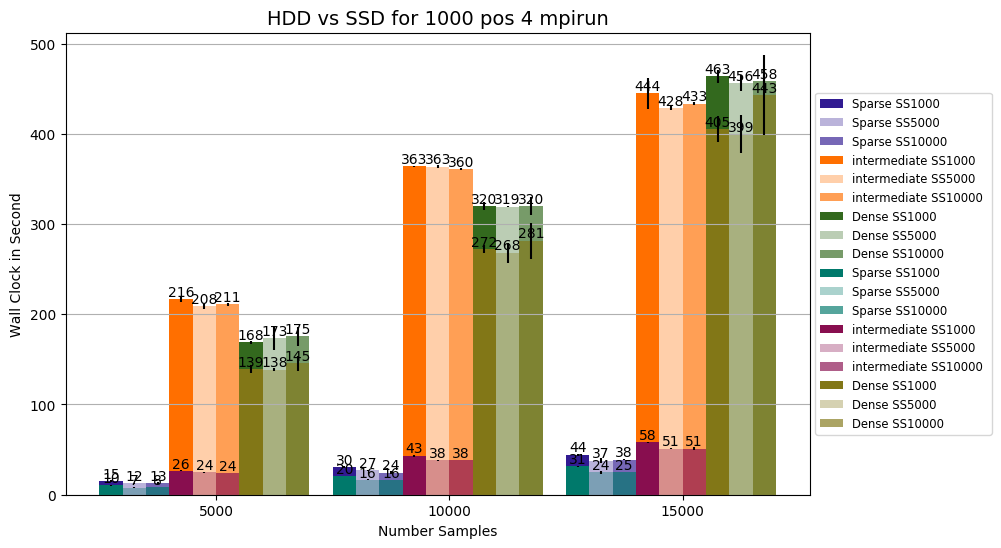

In [5]:
from py_report.variant_density_results import IlluminaResult, BY_CPU, BY_TIME
handler = IlluminaResult()
ret_list = handler.compare_by_num_sample([1, 2], None, [1000], BY_TIME, False)

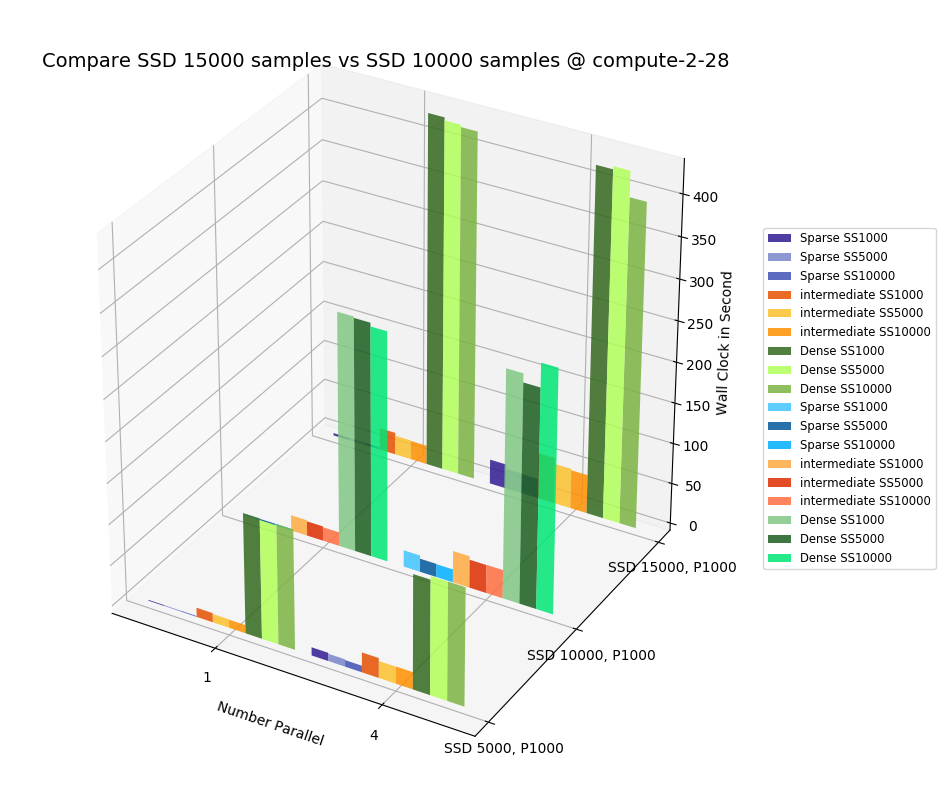

In [4]:
handler.view_3D_by_eids([5, 3, 1], [1000])   # SSD 162

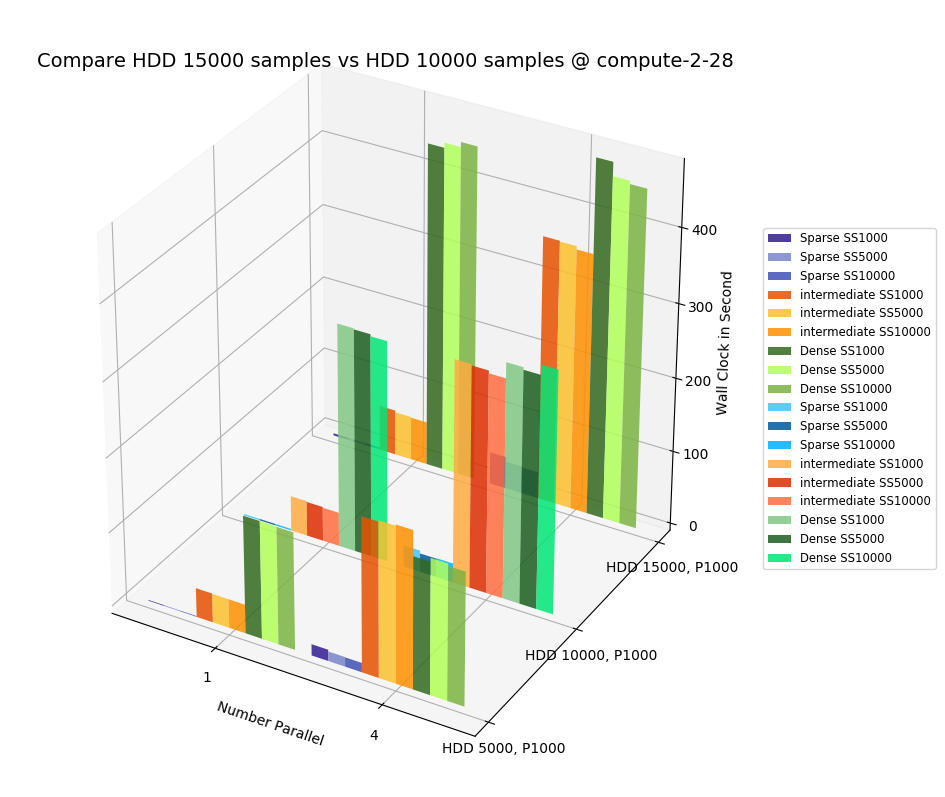

In [5]:
handler.view_3D_by_eids([4, 2, 0], [1000])   # HDD, 162

<code>
Solid-state drive (SSD): https://en.wikipedia.org/wiki/Solid-state_drive
eSata: https://en.wikipedia.org/wiki/SATA_Express
Non-Volatile Memory (NVM) Express: https://en.wikipedia.org/wiki/NVM_Express, 2007 Intel first; 2013 commercial, https://upload.wikimedia.org/wikipedia/commons/3/30/IO_stack_of_the_Linux_kernel.svg 

@ http://www.storagereview.com/ssd_vs_hdd
File Copy / Write Speed: 
    SSD - Generally above 200 MB/s and up to 550 MB/s for cutting edge drives	
    HDD - The range can be anywhere from 50 – 120MB / s
</code>

Questions: 
1. what is the name of Illumina VCF generator?
1. what is the throughput of our SATA bus?
1. will NVM be one of /dev/sd[abc] ?

Fragments:
  SSD 4.3% more space for 15 x 1K